In [3]:
from pdfminer.high_level import extract_text

valePDF = extract_text('vale.pdf').lower()
petrobrasPDF = extract_text('petrobras.pdf').lower()
marfrigPDF = extract_text('marfrig.pdf').lower()

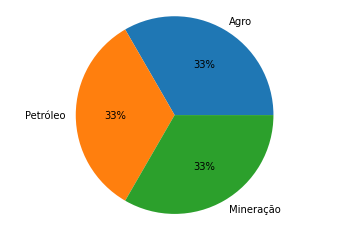

In [18]:
import matplotlib.pyplot as plt
from collections import Counter

def classification(pdf):
  pdf_words = pdf.split()
  mineracao_words = ["rochas", "rocha", "minério", "ferro"]
  petroleo_words = ["petróleo", "petroquímicos"]
  agro_words = ["soja", "grão", "milho", "agropecuária", "pomar", "horta", "agrícola"]

  agroCounter = sum(Counter(word for word in pdf_words if word in agro_words).values())
  petroleoCounter = sum(Counter(word for word in pdf_words if word in petroleo_words).values())
  mineracaoCounter = sum(Counter(word for word in pdf_words if word in mineracao_words).values())

  if (agroCounter > petroleoCounter and agroCounter > mineracaoCounter):
    return 'Agro'

  if (petroleoCounter > agroCounter and petroleoCounter > mineracaoCounter):
    return 'Petróleo'

  if (mineracaoCounter > agroCounter and mineracaoCounter > petroleoCounter):
    return 'Mineração'

  return "Sem classificação"

result = Counter([classification(valePDF), classification(petrobrasPDF), classification(marfrigPDF)])

labels = 'Agro', 'Petróleo', 'Mineração'
sizes = [result['Agro'], result['Petróleo'], result['Mineração']]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.0f%%')
ax1.axis('equal')
fig1.set_facecolor("w")

plt.show()